In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller


import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.graphics.api as smg

from scipy.optimize import curve_fit

In [2]:
#  Load datas

dataset  = pd.read_csv('2008-01-02-LEH.N-bbo.csv', index_col = 0)
dataset.index = pd.DatetimeIndex(dataset.index)

difference_set = np.log(dataset).diff()
difference_set.head(10)

bid-price  bid-volume  ask-price  ask-volume
time                                                                       
2008-01-02 14:31:59.900999680        NaN         NaN        NaN         NaN
2008-01-02 14:31:59.900999680   0.000000    0.000000        0.0   -0.089612
2008-01-02 14:31:59.900999680   0.000000    0.875469        0.0    0.000000
2008-01-02 14:31:59.900999680   0.000000    0.000000        0.0   -0.015748
2008-01-02 14:31:59.900999680   0.000000   -0.875469        0.0    0.000000
2008-01-02 14:31:59.948000000  -0.000616   -0.916291        0.0    0.000000
2008-01-02 14:31:59.948000000   0.000770   -0.693147        0.0    0.000000
2008-01-02 14:31:59.948000000  -0.000770    0.693147        0.0    0.000000
2008-01-02 14:31:59.968999936  -0.000771    2.708050        0.0    0.000000
2008-01-02 14:32:00.036000000   0.000000    0.000000        0.0   -0.032261

In [3]:
dataset.head(10)

bid-price  bid-volume  ask-price  ask-volume
time                                                                       
2008-01-02 14:31:59.900999680      64.95           5       65.0          70
2008-01-02 14:31:59.900999680      64.95           5       65.0          64
2008-01-02 14:31:59.900999680      64.95          12       65.0          64
2008-01-02 14:31:59.900999680      64.95          12       65.0          63
2008-01-02 14:31:59.900999680      64.95           5       65.0          63
2008-01-02 14:31:59.948000000      64.91           2       65.0          63
2008-01-02 14:31:59.948000000      64.96           1       65.0          63
2008-01-02 14:31:59.948000000      64.91           2       65.0          63
2008-01-02 14:31:59.968999936      64.86          30       65.0          63
2008-01-02 14:32:00.036000000      64.86          30       65.0          61

In [4]:
bid_price = dataset['bid-price']
bid_volume = dataset['bid-volume']

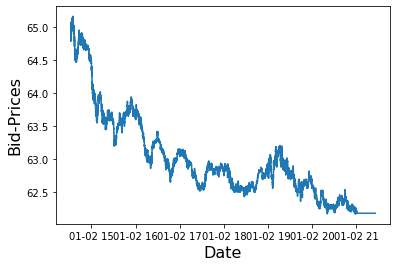

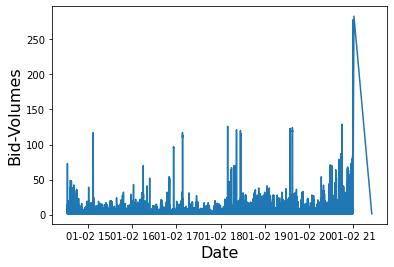

In [5]:
plt.figure(1)
plt.plot(bid_price)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Prices', fontsize = 16)
plt.show()

plt.figure(2)
plt.plot(bid_volume)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Volumes', fontsize = 16)
plt.show()

In [6]:
price_b_var = difference_set['bid-price']
volume_b_var = difference_set['bid-volume']

In [7]:
price_b_var =price_b_var[(price_b_var !=0)]
volume_b_var =volume_b_var[volume_b_var !=0]

price_b_var = price_b_var.iloc[1:]
volume_b_var = volume_b_var.iloc[1:]

In [8]:
price_b_var  = price_b_var[~price_b_var.index.duplicated(keep = 'last')]
volume_b_var  = volume_b_var[~volume_b_var.index.duplicated(keep = 'last')]

In [9]:
data = pd.concat([price_b_var, volume_b_var], axis = 1)

In [10]:
data = data.ffill(axis = 0)
data

bid-price  bid-volume
time                                                
2008-01-02 14:31:59.900999680        NaN   -0.875469
2008-01-02 14:31:59.948000000  -0.000770    0.693147
2008-01-02 14:31:59.968999936  -0.000771    2.708050
2008-01-02 14:32:00.036000000  -0.000154   -0.836248
2008-01-02 14:32:00.086000384   0.000771   -1.178655
...                                  ...         ...
2008-01-02 20:59:59.602999552   0.000643    0.167054
2008-01-02 20:59:59.668000000   0.000643    0.931558
2008-01-02 21:00:00.089000192   0.000643   -0.361013
2008-01-02 21:01:16.213999616  -0.000804    2.509953
2008-01-02 21:25:28.845999872  -0.000804   -5.645447

[34710 rows x 2 columns]

In [11]:
data_price = data.loc[price_b_var.index].iloc[1:]
data_price

bid-price  bid-volume
time                                                
2008-01-02 14:31:59.968999936  -0.000771    2.708050
2008-01-02 14:32:00.036000000  -0.000154   -0.836248
2008-01-02 14:32:00.086000384   0.000771   -1.178655
2008-01-02 14:32:00.100000256  -0.000771    1.178655
2008-01-02 14:32:00.734000384   0.000154   -4.290459
...                                  ...         ...
2008-01-02 20:59:41.705000192  -0.000161    3.417727
2008-01-02 20:59:53.475000064  -0.000161    2.275556
2008-01-02 20:59:55.706000384   0.000161   -1.938742
2008-01-02 20:59:59.514000128   0.000643    0.095310
2008-01-02 21:01:16.213999616  -0.000804    2.509953

[15348 rows x 2 columns]

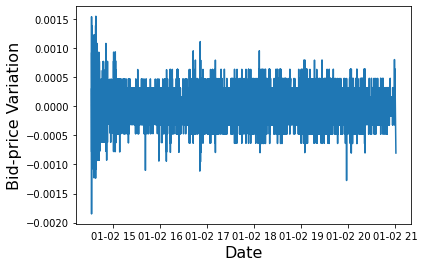

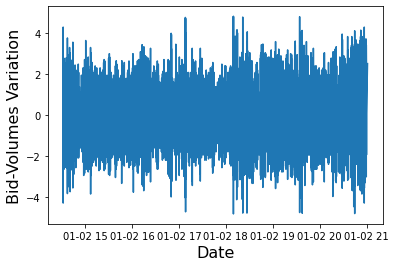

In [12]:
plt.figure(1)
plt.plot(data_price['bid-price'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-price Variation', fontsize = 16)
plt.show()

plt.figure(2)
plt.plot(data_price['bid-volume'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Volumes Variation', fontsize = 16)
plt.show()

In [13]:
#test

def proportion(price,volume):
    hist=np.zeros(4)

    for i in range (len(price)):
        if np.sign(volume[i]) == np.sign(price[i]) and np.sign(price[i])==1 :
            hist[0]+=1
            
        elif np.sign(volume[i]) == np.sign(price[i]) and np.sign(price[i])== -1 :
            hist[1]+=1
            
        elif np.sign(volume[i]) == 1 and np.sign(price[i])== -1:
            hist[2]+=1
            
        elif np.sign(volume[i]) == -1 and np.sign(price[i])== 1:
            hist[3]+=1
            
    return hist
    

In [82]:
wind = 2000
tbegin = 1000
nit = 100
prop = []


for t in range(nit):
    in_sample = data_price.iloc[ t*100 : t*100 + wind]
    prop.append(proportion(in_sample['bid-price'].values, in_sample['bid-volume'].values))
prop = np.array(prop)

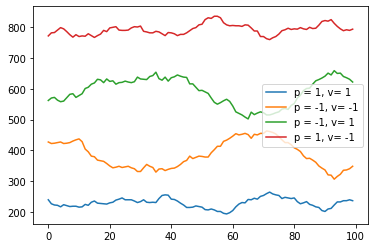

In [83]:
plt.plot(prop[:,0] , label = 'p = 1, v= 1')
plt.plot(prop[:,1] , label = 'p = -1, v= -1')
plt.plot(prop[:,2] , label = 'p = -1, v= 1')
plt.plot(prop[:,3] , label = 'p = 1, v= -1')
plt.legend(loc = 'best')
plt.show()

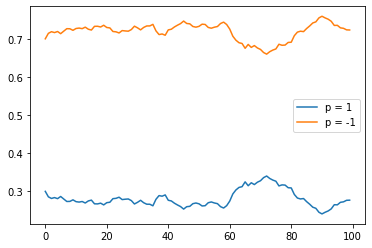

In [84]:
#On peut regarder les probas conditionnels

#Probas si v = 1
prob_v1 = np.concatenate(([prop[:,0]],[prop[:,2]]))
prob_v1 = (prob_v1)/(prop[:,0]+prop[:,2])

plt.plot(prob_v1[0], label = 'p = 1')
plt.plot(prob_v1[1], label = 'p = -1')
plt.legend(loc = 'best')

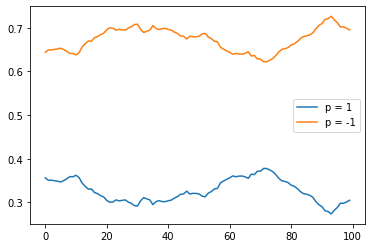

In [85]:
#Probas si v = -1
prob_vm1 = np.concatenate(([prop[:,1]],[prop[:,3]]))
prob_vm1 = (prob_vm1)/(prop[:,1]+prop[:,3])

plt.plot(prob_vm1[0], label = 'p = 1')
plt.plot(prob_vm1[1], label = 'p = -1')
plt.legend(loc = 'best')

In [89]:
# test 2

def proportion_prec(price,volume):
    
    number =np.zeros(8)

    for i in range (1,len(price)):
        if np.sign(volume[i]) == np.sign(price[i]) and np.sign(price[i])==1 and np.sign(price[i-1])==1 :
            number[0]+=1
        
        elif np.sign(volume[i]) == np.sign(price[i]) and np.sign(price[i]) == 1 and np.sign(price[i-1])== -1 :
            number[1]+=1
            
        elif np.sign(volume[i]) == np.sign(price[i]) and np.sign(price[i])== -1 and np.sign(price[i-1]) == 1 :
            number[2]+=1
        
        elif np.sign(volume[i]) == np.sign(price[i]) and np.sign(price[i])== -1 and np.sign(price[i-1]) == -1 :
            number[3]+=1
            
        elif np.sign(volume[i]) == 1 and np.sign(price[i])== -1 and np.sign(price[i-1]) == 1:
            number[4]+=1
        
        elif np.sign(volume[i]) == 1 and np.sign(price[i])== -1 and np.sign(price[i-1]) == -1:
            number[5]+=1
            
        elif np.sign(volume[i]) == -1 and np.sign(price[i])== 1 and np.sign(price[i-1]) == 1:
            number[6]+=1
        
        elif np.sign(volume[i]) == -1 and np.sign(price[i])== 1 and np.sign(price[i-1]) == -1:
            number[7]+=1
            
    return number
    

In [90]:
wind = 2000
tbegin = 1000
nit = 100
prop2 = []


for t in range(nit):
    in_sample = data_price.iloc[ t*100 : t*100 + wind]
    prop2.append(proportion_prec(in_sample['bid-price'].values, in_sample['bid-volume'].values))
    
prop2 = np.array(prop2)

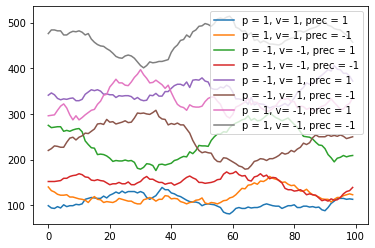

In [98]:
plt.plot(prop2[:,0] , label = 'p = 1, v= 1, prec = 1')
plt.plot(prop2[:,1] , label = 'p = 1, v= 1, prec = -1')
plt.plot(prop2[:,2] , label = 'p = -1, v= -1, prec = 1')
plt.plot(prop2[:,3] , label = 'p = -1, v= -1, prec = -1')
plt.plot(prop2[:,4] , label = 'p = -1, v= 1, prec = 1')
plt.plot(prop2[:,5] , label = 'p = -1, v= 1, prec = -1')
plt.plot(prop2[:,6] , label = 'p = 1, v= -1, prec = 1')
plt.plot(prop2[:,7] , label = 'p = 1, v= -1, prec = -1')
plt.legend(loc = 'best')
plt.show()

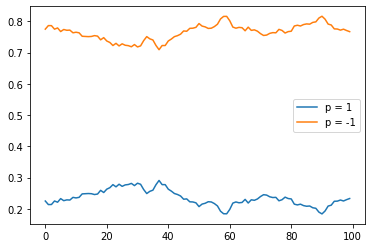

In [99]:
# Conditional probabilité
# Knowing the previous volume and the previous price,


# v = 1 and p_-1 = 1

prob_v1_p1 = np.concatenate(([prop2[:,0]],[prop2[:,4]]))
prob_v1_p1 = (prob_v1_p1)/(prop2[:,0]+prop2[:,4])

plt.plot(prob_v1_p1[0], label = 'p = 1')
plt.plot(prob_v1_p1[1], label = 'p = -1')
plt.legend(loc = 'best')

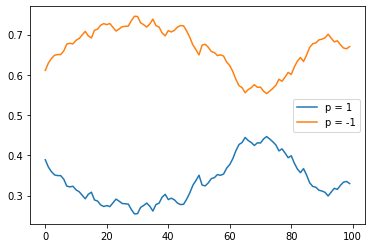

In [100]:
# v = 1 and p_-1 = -1

prob_v1_pm1 = np.concatenate(([prop2[:,1]],[prop2[:,5]]))
prob_v1_pm1 = (prob_v1_pm1)/(prop2[:,1]+prop2[:,5])

plt.plot(prob_v1_pm1[0], label = 'p = 1')
plt.plot(prob_v1_pm1[1], label = 'p = -1')
plt.legend(loc = 'best')

In [ ]:
# v = -1 and p_-1 = 1

prob_vm1_p1 = np.concatenate(([prop2[:,1]],[prop2[:,7]]))
prob_vm1_p1 = (prob_vm1_p1)/(prop2[:,1]+prop2[:,7])

plt.plot(prob_v1_pm1[0], label = 'p = 1')
plt.plot(prob_v1_pm1[1], label = 'p = -1')
plt.legend(loc = 'best')